In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
imoveis = pd.read_csv(r'C:\Users\kelvyn.candido\Desktop\ESTUDOS\2 .FIAP\POS TECH ANALYTICS FIAP\imoveis\dados\data.csv', sep=',')

In [3]:
imoveis.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<Axes: >

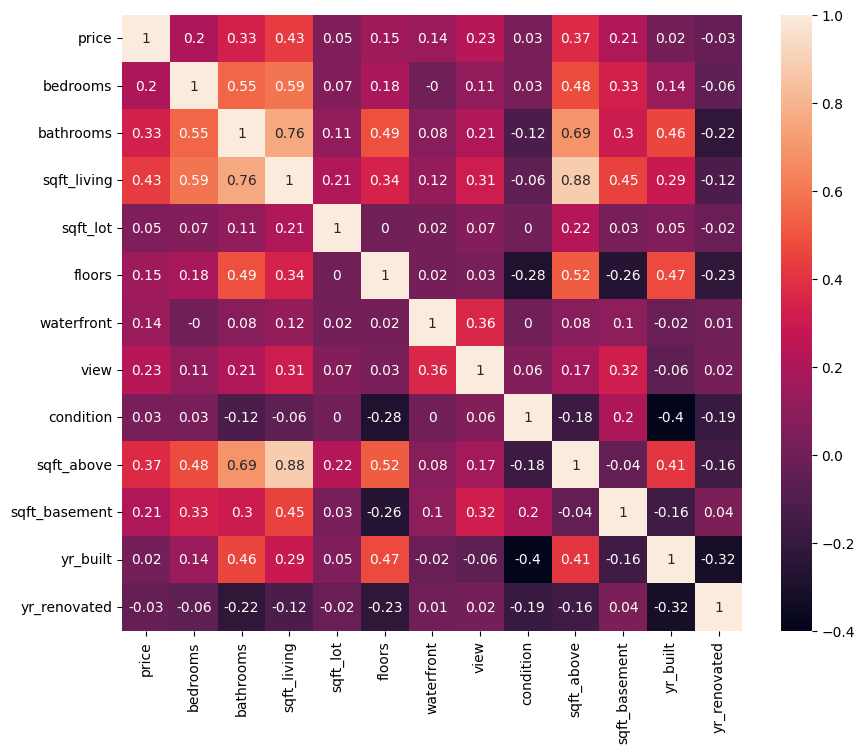

In [14]:
correration = imoveis.corr(numeric_only= True).round(2)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=correration, annot=True, ax=ax)


Plotar correlação entre banheiro e sala com preço.

Vamos verificar a correlação e validar se será necessario normalizar os dados

In [5]:
x = imoveis[["sqft_living",'bathrooms']].values
y = imoveis['price'].values

<Axes: xlabel='sqft_living', ylabel='price'>

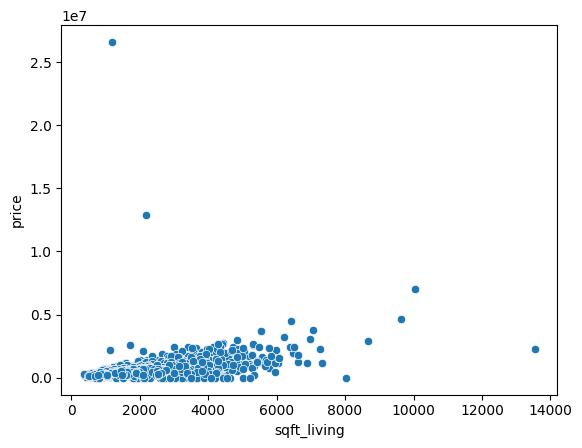

In [6]:
sns.scatterplot(data=imoveis, x='sqft_living', y='price')

<Axes: xlabel='bathrooms', ylabel='price'>

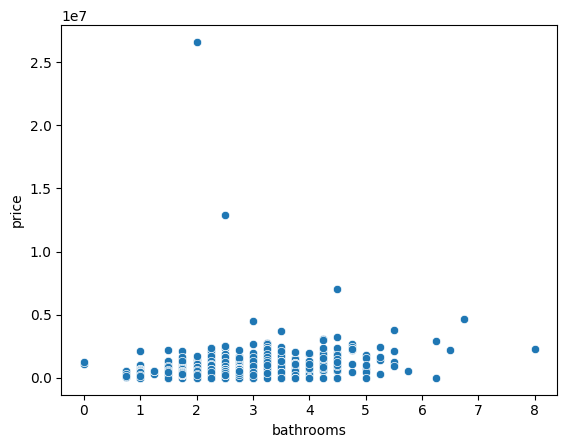

In [7]:
sns.scatterplot(data=imoveis, x='bathrooms', y='price')

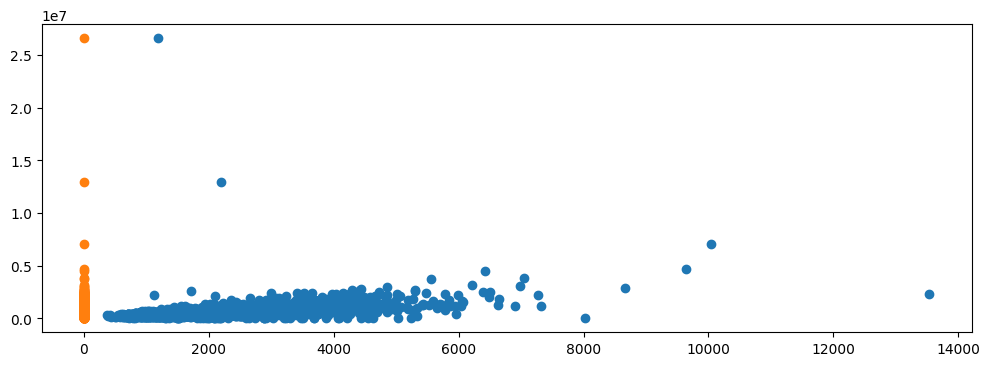

In [8]:
fia, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x[:, 0], y)
ax.scatter(x[:, 1], y)
plt.show()


Agora vamos verificar o comportamento dos dados


<Axes: xlabel='sqft_living', ylabel='Count'>

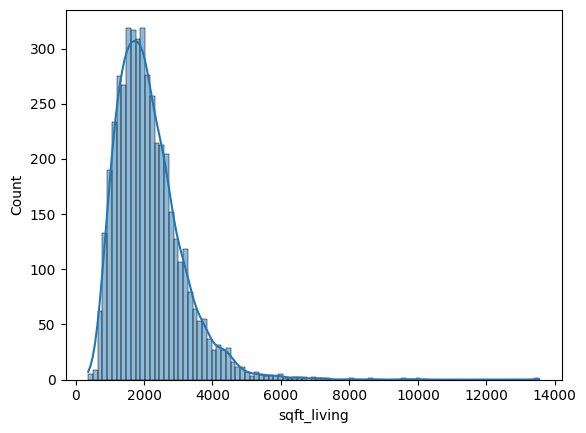

In [9]:
sns.histplot(data=imoveis, x='sqft_living', kde=True)

<Axes: xlabel='bathrooms', ylabel='Count'>

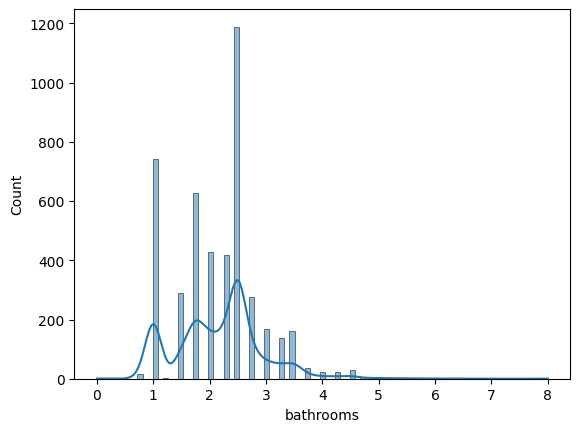

In [10]:
sns.histplot(data=imoveis, x='bathrooms', kde=True)

In [11]:
hist_variaveis = pd.DataFrame(imoveis[['sqft_living', 'bathrooms']])

<Axes: >

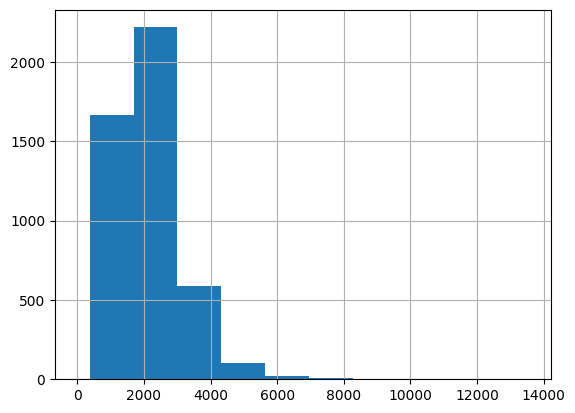

In [12]:
hist_variaveis.sqft_living.hist()
hist_variaveis.bathrooms.hist()

Visto que não e possivel ter uma visualização adequada dos dados, entemdemos que será necessario normalizar padronizar os dados que possuem escalas diferentes.

Sala = a escala fala sobremetragem da  sala
Banheiro = fala sobre quantidade de banheiros 

Tendo isso em vista, entedmos que a escala de medidas são diferentes, precisaremos ajustar esses dados.

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Agora vamos fazer o trabalho de padronização, vamos usar o StandardScaller para fazer a padronização.
O StandardScaler ele coloca a media dos dados em 0 e deixando o desvio padrão dos dados como unitario.


Relembrando as variaveis que vamos tratrar

x = imoveis[["sqft_living",'bathrooms']].values

y = imoveis['price'].values

In [15]:
# Padronizando os dados

scaler = StandardScaler()
x_std = scaler.fit_transform(x)


In [18]:
x_std

array([[-0.82997105, -0.84320364],
       [ 1.56852826,  0.43280154],
       [-0.21736733, -0.20520105],
       ...,
       [ 0.90400897,  0.43280154],
       [-0.05123751, -0.20520105],
       [-0.67422434,  0.43280154]])

<Axes: >

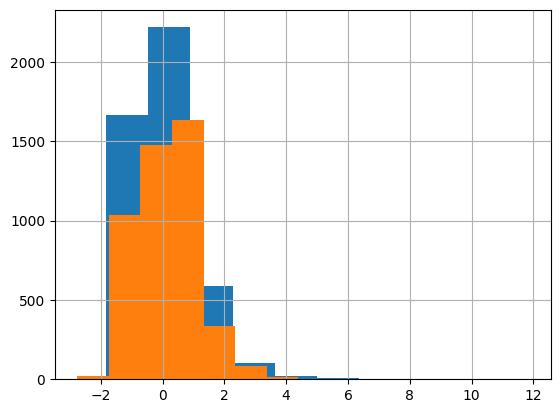

In [19]:
# Histograma dos dados padronizados
x_std = pd.DataFrame(x_std, columns=['sqft_living', 'bathrooms'])
x_std.sqft_living.hist()
x_std.bathrooms.hist()